## Looking at the GrowClust results from Sep 14-20 2017 (a time when there was a lot of eq activity), for vent field earthquakes only

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
outfile = '/Users/zoekrauss/GrowClust3D/endeavour/data/out/end_out_0520_1.grid3D.cat'

In [54]:
cat = pd.read_csv(outfile,header=None,delim_whitespace=True)
cat.rename(columns={0:'yr',1:'mon',2:'day',3:'hr',4:'min',5:'sec',6:'evid',7:'latR',8:'lonR',9:'depR',\
                   10:'mag',11:'ev_serialID',12:'clusterID',13:'clustersize',14:'npair',15:'ndiffP',\
                   16:'ndiffS',17:'rmsP',18:'rmsS',19:'erh',20:'erz',21:'ert',22:'latC',23:'lonC',24:'depC'},inplace=True)

# Make a datetime column
cat = cat.astype({'yr':'int','mon':'int','day':'int','hr':'int','min':'int'})
cat['eventTime'] = cat[["yr","mon","day","hr","min"]].apply(lambda x: '-'.join(x.values.astype(int).astype(str)), axis="columns")
cat['eventTime'] = cat[['eventTime','sec']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
cat['eventTime']=pd.to_datetime(cat['eventTime'],format='%Y-%m-%d-%H-%M-%S.%f')


# Isolate events that actually got relocated
reloc = cat[~cat['rmsP'].isnull()]

In [55]:
clusters = reloc['clusterID'].unique()

## Here we see that while the clusters of groups likely make sense (since they are based largely on cross-correlation information), the relative relocations are crap. This tells me that I need to do a better job of calculating those differential travel times. That's my next step!

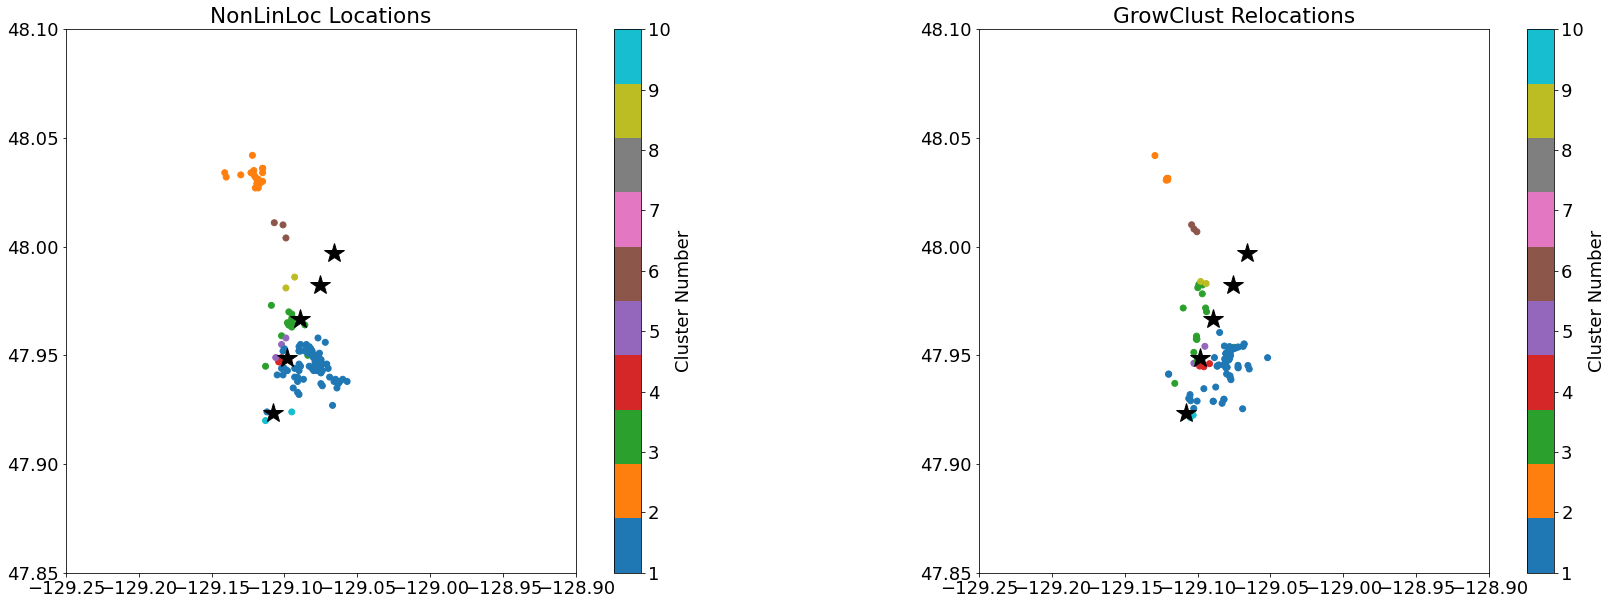

In [56]:
vent_lon=[-129.098100000000,-129.089400000000,-129.075600000000,-129.108200000000,-129.066200000000]
vent_lat=[47.9487000000000,47.9666000000000,47.9822000000000,47.9233000000000,47.9969000000000] 

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1, 2,figsize=[30,10])

ax[0].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[0].set_xlim([-129.25,-128.9])
ax[0].set_ylim([47.85,48.1])
ax[0].set_aspect(1/0.67);
s =ax[0].scatter(reloc['lonC'],reloc['latC'],c=reloc['clusterID'],cmap='tab10')
ax[0].set_title('NonLinLoc Locations')
cbar = plt.colorbar(s,ax=ax[0])
cbar.set_label('Cluster Number')


ax[1].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[1].set_xlim([-129.25,-128.9])
ax[1].set_ylim([47.85,48.1])
ax[1].set_aspect(1/0.67);
s=ax[1].scatter(reloc['lonR'],reloc['latR'],c=reloc['clusterID'],cmap='tab10')
ax[1].set_title('GrowClust Relocations')
cbar = plt.colorbar(s,ax=ax[1])
cbar.set_label('Cluster Number')

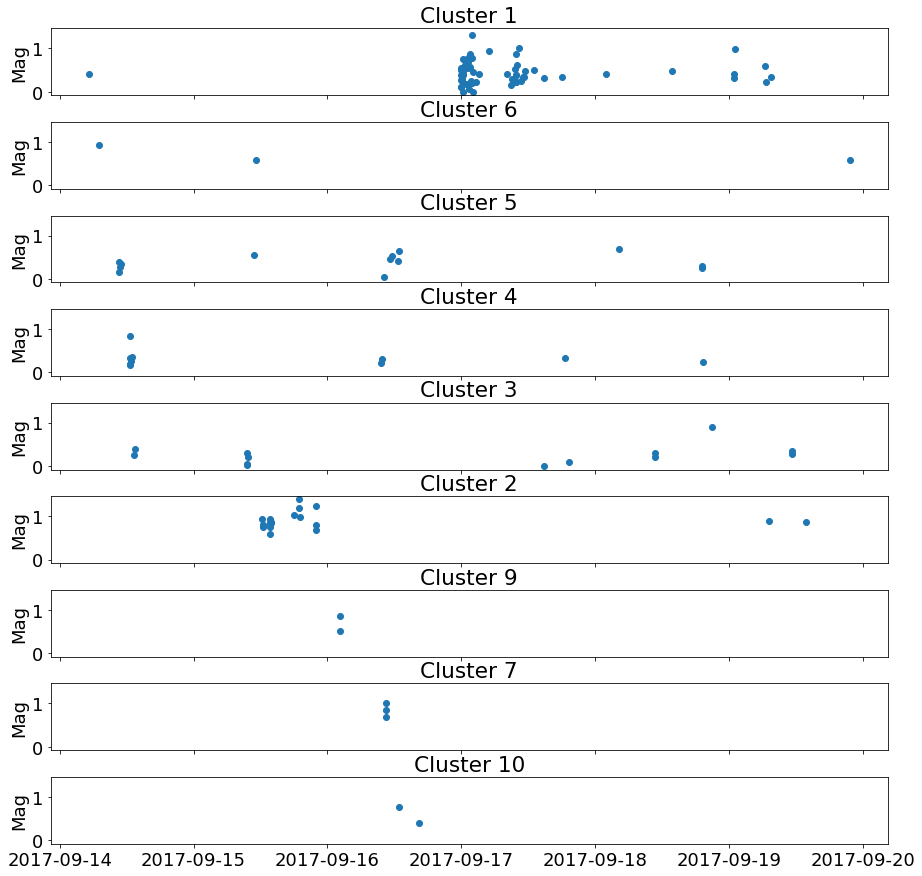

In [50]:
fig,ax = plt.subplots(len(clusters),1,sharex=True,figsize=(15,15),sharey=True)

for i,cnum in enumerate(clusters):
    
    clust = reloc[reloc['clusterID']==cnum]
    ax[i].scatter(clust['eventTime'],clust['mag'])
    ax[i].set_title('Cluster '+str(cnum))
    ax[i].set_ylabel('Mag')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

In [34]:
clust = reloc[reloc['clusterID']==2]

In [35]:
clust

,yr,mon,day,hr,min,sec,evid,latR,lonR,depR,...,ndiffS,rmsP,rmsS,erh,erz,ert,latC,lonC,depC,eventTime
9184,2017,9,15,12,11,47.202,520274,48.03129,-129.12055,3.108,...,63,0.00,0.01,NaN,NaN,NaN,48.035,-129.121,2.990,2017-09-15 12:11:47.202
9189,2017,9,15,12,29,13.451,520280,48.03124,-129.12066,3.024,...,62,0.00,0.01,NaN,NaN,NaN,48.042,-129.122,3.000,2017-09-15 12:29:13.451
9190,2017,9,15,12,30,13.224,520281,48.03145,-129.12056,3.052,...,62,0.00,0.01,NaN,NaN,NaN,48.031,-129.118,3.010,2017-09-15 12:30:13.224
9191,2017,9,15,12,32,51.426,520282,48.03132,-129.12052,3.086,...,63,0.00,0.01,NaN,NaN,NaN,48.031,-129.119,2.990,2017-09-15 12:32:51.426
9193,2017,9,15,13,37,42.851,520284,48.03115,-129.12074,3.003,...,49,0.00,0.04,NaN,NaN,NaN,48.027,-129.120,3.010,2017-09-15 13:37:42.851
9194,2017,9,15,13,38,17.385,520285,48.03099,-129.12055,3.065,...,62,0.00,0.01,NaN,NaN,NaN,48.032,-129.120,2.991,2017-09-15 13:38:17.385
9195,2017,9,15,13,40,2.354,520286,48.04190,-129.12925,2.111,...,33,0.01,0.04,NaN,NaN,NaN,48.036,-129.115,3.010,2017-09-15 13:40:02.354
9196,2017,9,15,13,40,6.035,520287,48.03133,-129.12062,3.074,...,61,0.00,0.01,NaN,NaN,NaN,48.036,-129.115,2.990,2017-09-15 13:40:06.035
9197,2017,9,15,13,43,54.028,520288,48.03127,-129.12076,3.000,...,61,0.00,0.01,NaN,NaN,NaN,48.033,-129.130,2.990,2017-09-15 13:43:54.028
9198,2017,9,15,13,49,12.232,520289,48.03128,-129.12104,3.028,...,62,0.00,0.01,NaN,NaN,NaN,48.030,-129.115,3.000,2017-09-15 13:49:12.232


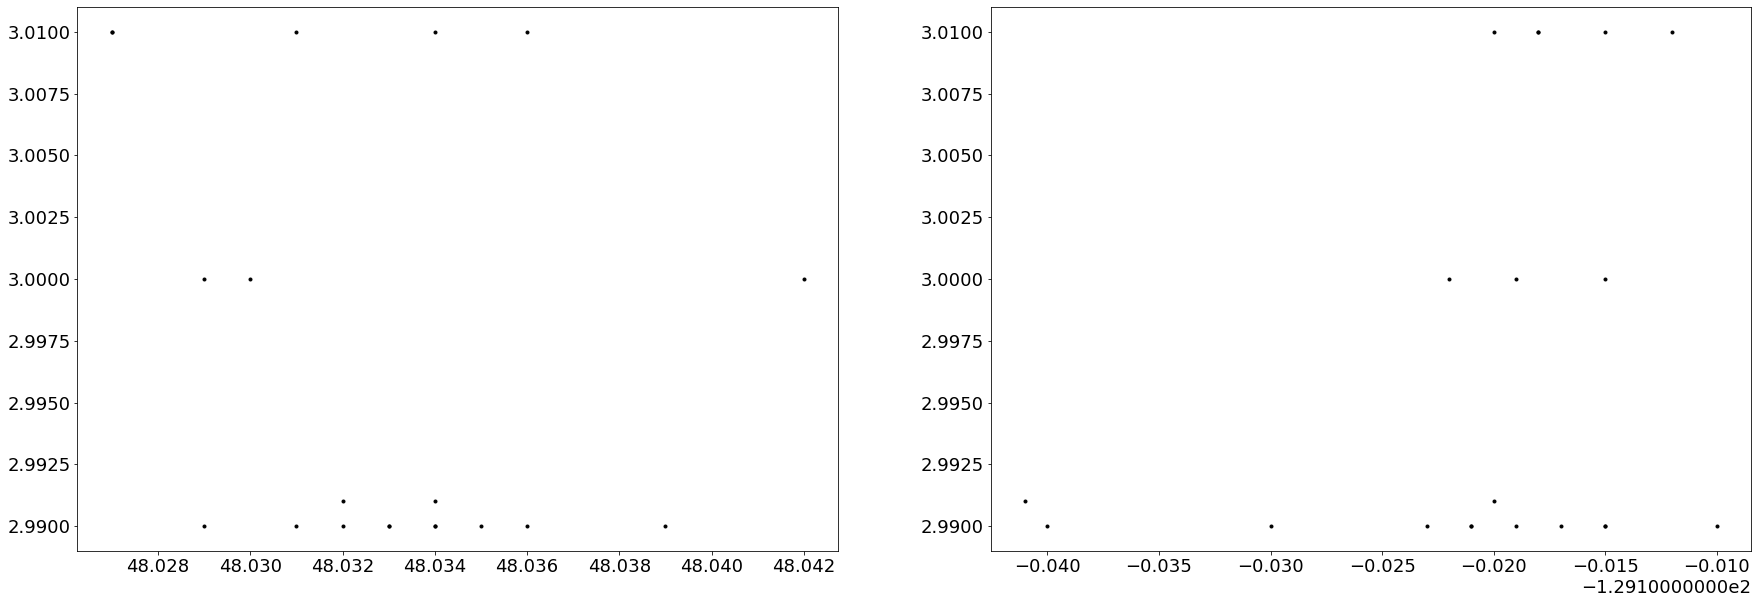

In [51]:
clust = reloc[reloc['clusterID']==2]

fig, ax = plt.subplots(1, 2,figsize=[30,10])
ax[0].plot(clust['latC'],clust['depC'],'k.')
ax[1].plot(clust['lonC'],clust['depC'],'k.')

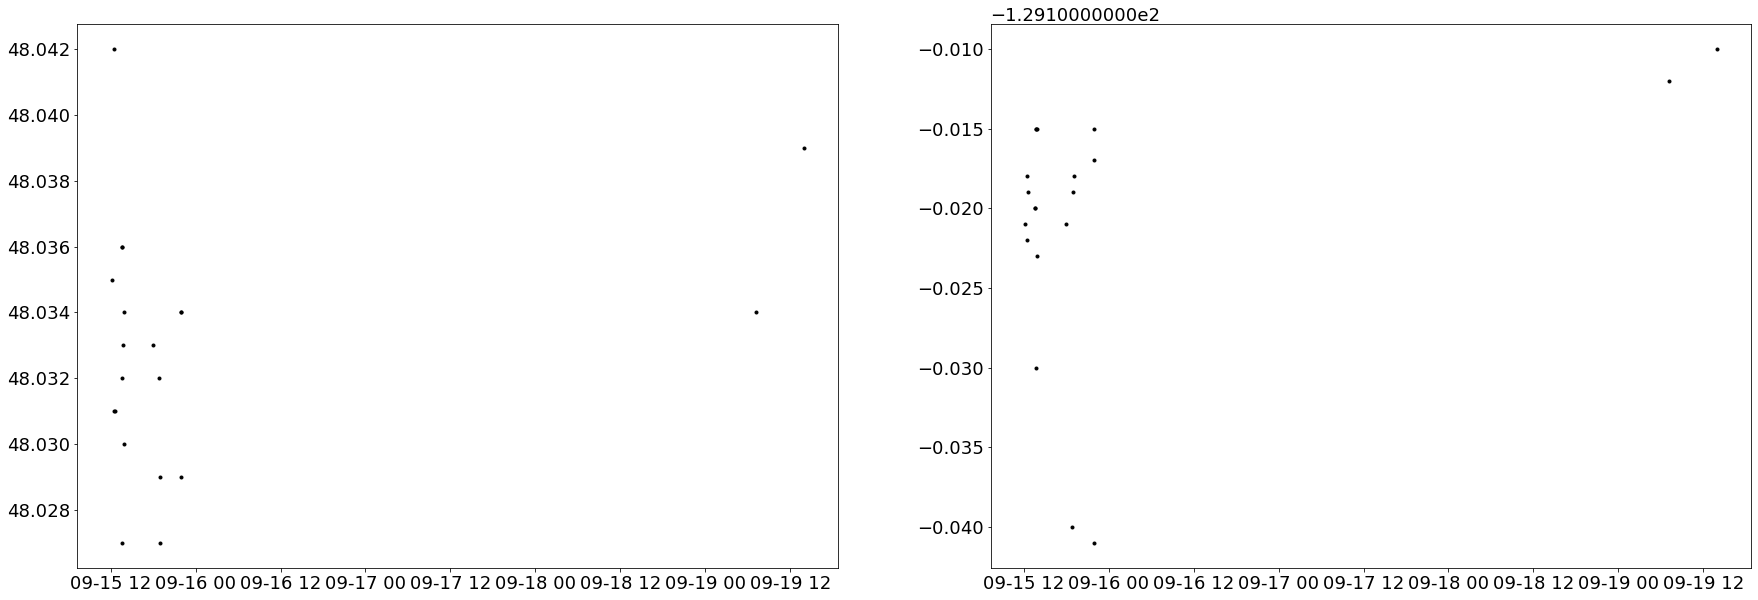

In [52]:
clust = reloc[reloc['clusterID']==2]

fig, ax = plt.subplots(1,2,figsize=[30,10])
ax[0].plot(clust['eventTime'],clust['latC'],'k.')
ax[1].plot(clust['eventTime'],clust['lonC'],'k.')